In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
color_palette = {
    'region': ['region_berner-mitelland', 'region_berner-oberland', 'region_freiburg-neuenburg-jura', 'region_graubuenden', 'region_nordwestschweiz', 'region_ostschweiz', 'region_tessin', 'region_waadt-genfersee', 'region_wallis', 'region_zentralschweiz', 'region_zuerich'],
    'color': ['#5188AD', '#E9D797', '#CAA2C0' , '#8B76B4', '#EEA760', '#E26D64', '#B65278', '#A6CAEC', '#619589', '#AC9186', '#809668']
}


# Daten camping.ch
### Import

In [107]:
df_camping = pd.read_csv('campingspider/camping.csv', encoding='utf-8')
df_camping.head()

,url,name,locality,website,star category,activities,tourist pitches,open (seasons 1),open (seasons 2),open (seasons 3),...,laundry dryer / tumble dryer,hiking,lake with sandy beach,lake with stony beach,river,train station,bus,VSC membership,TCS membership,SCCV membership
0,https://camping.ch/de/campingplatz/graubuenden...,Islas,7477 Filisur (GR),www.campingislas.ch,3,3,50.0,01.04.2024 − 31.10.2024,NaN,NaN,...,1,1,0,0,0,1,0,1,0,1
1,https://camping.ch/de/campingplatz/ostschweiz/...,Stellplatz Allmend Rheintal,9450 Altstätten (SG),NaN,0,7,NaN,01.01.2024 − 31.12.2024,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
2,https://camping.ch/de/campingplatz/freiburg-ne...,Camping de la Forêt,1642 Sorens (FR),NaN,4,4,50.0,15.04.2024 − 15.10.2024,NaN,NaN,...,1,1,0,0,0,0,1,1,0,0
3,https://camping.ch/de/campingplatz/graubuenden...,Sur En / Sent,7554 Sur En / Sent (GR),NaN,4,4,120.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,1,0,0,1,1,1,1,0,0
4,https://camping.ch/de/campingplatz/wallis/evol...,Evolène,1983 Evolène (VS),NaN,3,1,65.0,15.05.2024 − 15.10.2024,NaN,NaN,...,1,1,0,0,0,0,1,0,0,0


### Ersetzen von falschen Stellplatz-Werten

In [108]:
filtered_touristp_df = df_camping[df_camping['tourist pitches'].isna() | (df_camping['tourist pitches'] < 11)]
filtered_touristp_df[['url', 'tourist pitches']]

,url,tourist pitches
1,https://camping.ch/de/campingplatz/ostschweiz/...,NaN
14,https://camping.ch/de/campingplatz/ostschweiz/...,3.0
15,https://camping.ch/de/campingplatz/wallis/semb...,0.0
19,https://camping.ch/de/campingplatz/berner-ober...,7.0
46,https://camping.ch/de/campingplatz/zentralschw...,8.0
47,https://camping.ch/de/campingplatz/zentralschw...,10.0
49,https://camping.ch/de/campingplatz/waadt-genfe...,NaN
63,https://camping.ch/de/campingplatz/zentralschw...,NaN
90,https://camping.ch/de/campingplatz/tessin/mont...,NaN
100,https://camping.ch/de/campingplatz/freiburg-ne...,9.0


In [109]:
# Es wurden die Campingplätze mit Anzahl Touristenplätze < 10 und 'nan' geprüft.
# Quelle: Internetseite der Campingplätze.
corrections_pitches = {
    'https://camping.ch/de/campingplatz/ostschweiz/weesen/camping-gaesi?l=true': 70,
    'https://camping.ch/de/campingplatz/waadt-genfersee/forel/camping-de-forel?l=true': 43,
    'https://camping.ch/de/campingplatz/ostschweiz/Altst%25C3%25A4tten/allmend_rheintal?l=true': 150,
    'https://camping.ch/de/campingplatz/wallis/ritzingen/camping-brigga?l=true': 127,
    'https://camping.ch/de/campingplatz/ostschweiz/mammern/seewiese?l=true': 95,
    'https://camping.ch/de/campingplatz/zentralschweiz/seelisberg/naturcamping_seelisberg?l=true': 60,
    'https://camping.ch/de/campingplatz/tessin/monteggio/boscodellabella?l=true': 10,
    'https://camping.ch/de/campingplatz/freiburg-neuenburg-jura/le-noirmont/camping-du-creux-des-biches?l=true': 40,
    'https://camping.ch/de/campingplatz/zentralschweiz/sisikon/camping_bucheli?l=true': 50,
    'https://camping.ch/de/campingplatz/wallis/sembrancher/la-prairie?l=true': 48,
    'https://camping.ch/de/campingplatz/berner-mitelland/rueschegg-heubach/camping-rueschegg-heubach?l=true': 20,
    'https://camping.ch/de/campingplatz/zentralschweiz/morgarten/camping_neselen?l=true': 40,
    'https://camping.ch/de/campingplatz/berner-oberland/boenigen/seeruhe?l=true': 88,
    'https://camping.ch/de/campingplatz/ostschweiz/stein-a-rhein/grenzstein?l=true': 64,
    'https://camping.ch/de/campingplatz/berner-oberland/saanen/beim-kappeli?l=true': 27,
    'https://camping.ch/de/campingplatz/freiburg-neuenburg-jura/rebeuvilier/du-raimeux?l=true': 31,
    'https://camping.ch/de/campingplatz/berner-oberland/gsteig-b-gstaad/bergcamping-gsteig?l=true': 16,
    'https://camping.ch/de/campingplatz/berner-oberland/schwenden-im-diemtigtal/camping-eggmatte-diemtigtal?l=true': 16,
    'https://camping.ch/de/campingplatz/freiburg-neuenburg-jura/le-landeron/bellerive-le-landeron?l=true': 50,
}

# Funktion zur Korrektur der Anzahl Touristenplätze
def correct_dates(row):
    if row['url'] in corrections_pitches:
        return corrections_pitches[row['url']]
    return row['tourist pitches']

# Anzahl Touristenplätze im DataFrame korrigieren
df_camping['tourist pitches'] = df_camping.apply(correct_dates, axis=1)

### Ersetzen von falschen Datums-Werten

In [110]:
# Folgende drei Saisondaten waren mit null Tagen hinterlegt und wurden deshalb manuell nachgeschaut. Die restlichen Saisondaten wurden nicht nachgeprüft.
corrections_date = {
    'Camping Bellavista': '12.04.2024 - 13.10.2024',
    'Camping Schaffhausen - Freizeitanlage Rheinwiese': '27.03.2024 - 20.10.2024',
    'Nufenenpark': '01.06.2024 - 30.09.2024'
}

# Funktion zur Korrektur der Datumsangaben
def correct_dates(row):
    if row['name'] in corrections_date:
        return corrections_date[row['name']]
    return row['open (seasons 1)']

# Datumsangaben im DataFrame korrigieren
df_camping['open (seasons 1)'] = df_camping.apply(correct_dates, axis=1)

### Berechnung prozentuale Öffnungszeiten
Tage Jahr: 365 (Vereinfachung)

In [111]:
from datetime import datetime
# Tage von Öffnung bis Schliessung der Saison
def process_column_value(value):
    # leere Zellen:
    if pd.isna(value) or value == "":
        return 0
    try:
        # wenn ein Text vor dem Datum steht, sollen die Zeichen nach dem Doppelpunkt für das Datum verwendet werden
        if ':' in value:
            middle_value = value[value.find(':') + 2: value.find(':') + 12].strip()
            open_date = datetime.strptime(middle_value, '%d.%m.%Y')
            end_date = datetime.strptime(value[-10:].strip(), '%d.%m.%Y')
            return  (end_date - open_date).days
        end_date = datetime.strptime(value[-10:].strip(), '%d.%m.%Y')
        open_date = datetime.strptime(value[:10].strip(), '%d.%m.%Y')
        return (end_date - open_date).days
    except:
        print(f"Fehler bei der Verarbeitung von Wert {value}")
        return 0

# für alle Saison die Tage berechnen (falls mehrere) und zusammenzählen
def calculate_row(row):
    columns = ['open (seasons 1)', 'open (seasons 2)', 'open (seasons 3)', 'open (seasons 4)', 'open (seasons 5)', 'open (seasons 6)', 'open (seasons 7)']
    total = 0
    for col in columns:
        total += process_column_value(row[col])
    return total

# Neue Spalte mit Tagen erstellen, indem die Berechnung auf jede Zeile angewandt wird
df_camping['open[day]'] = df_camping.apply(calculate_row, axis=1)

In [112]:
# prozentualer Anteil der offenen Tage am Gesamtjahr
df_camping['open[%]'] = df_camping['open[day]'].apply(lambda x: round(x / 365,2) if x <= 365 else 365/365)

In [113]:
df_camping

,url,name,locality,website,star category,activities,tourist pitches,open (seasons 1),open (seasons 2),open (seasons 3),...,lake with sandy beach,lake with stony beach,river,train station,bus,VSC membership,TCS membership,SCCV membership,open[day],open[%]
0,https://camping.ch/de/campingplatz/graubuenden...,Islas,7477 Filisur (GR),www.campingislas.ch,3,3,50.0,01.04.2024 − 31.10.2024,NaN,NaN,...,0,0,0,1,0,1,0,1,213,0.58
1,https://camping.ch/de/campingplatz/ostschweiz/...,Stellplatz Allmend Rheintal,9450 Altstätten (SG),NaN,0,7,150.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,0,0,0,0,0,0,365,1.00
2,https://camping.ch/de/campingplatz/freiburg-ne...,Camping de la Forêt,1642 Sorens (FR),NaN,4,4,50.0,15.04.2024 − 15.10.2024,NaN,NaN,...,0,0,0,0,1,1,0,0,183,0.50
3,https://camping.ch/de/campingplatz/graubuenden...,Sur En / Sent,7554 Sur En / Sent (GR),NaN,4,4,120.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,1,1,1,1,0,0,365,1.00
4,https://camping.ch/de/campingplatz/wallis/evol...,Evolène,1983 Evolène (VS),NaN,3,1,65.0,15.05.2024 − 15.10.2024,NaN,NaN,...,0,0,0,0,1,0,0,0,153,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,https://camping.ch/de/campingplatz/berner-ober...,Alpencamping,3860 Meiringen (BE),www.alpencamping.ch,4,11,34.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,1,1,1,1,1,0,0,365,1.00
373,https://camping.ch/de/campingplatz/wallis/fies...,Eggishorn,3984 Fiesch (VS),NaN,4,6,127.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,1,1,1,1,0,0,365,1.00
374,https://camping.ch/de/campingplatz/berner-ober...,Camping Hobby 3,3800 Unterseen-Interlaken (BE),NaN,4,11,80.0,01.04.2024 − 04.10.2024,NaN,NaN,...,0,1,1,1,1,1,0,0,186,0.51
375,https://camping.ch/de/campingplatz/tessin/meri...,Camping Monte San Giorgio,6866 Meride (TI),NaN,4,8,64.0,19.04.2024 − 29.09.2024,NaN,NaN,...,0,0,1,0,1,1,1,0,163,0.45


## Region extrahieren aus 'url'

In [114]:
# Funktion zum Extrahieren der Region aus der URL
def extract_region(url):
    parts = url.split('/')
    if len(parts) > 5:
        return parts[5]  # Das Wort nach dem fünften '/' in der URL
    else:
        return None

# Neue Spalte 'region' erstellen
df_camping['region'] = df_camping['url'].apply(extract_region)

df_camping

,url,name,locality,website,star category,activities,tourist pitches,open (seasons 1),open (seasons 2),open (seasons 3),...,lake with stony beach,river,train station,bus,VSC membership,TCS membership,SCCV membership,open[day],open[%],region
0,https://camping.ch/de/campingplatz/graubuenden...,Islas,7477 Filisur (GR),www.campingislas.ch,3,3,50.0,01.04.2024 − 31.10.2024,NaN,NaN,...,0,0,1,0,1,0,1,213,0.58,graubuenden
1,https://camping.ch/de/campingplatz/ostschweiz/...,Stellplatz Allmend Rheintal,9450 Altstätten (SG),NaN,0,7,150.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,0,0,0,0,0,365,1.00,ostschweiz
2,https://camping.ch/de/campingplatz/freiburg-ne...,Camping de la Forêt,1642 Sorens (FR),NaN,4,4,50.0,15.04.2024 − 15.10.2024,NaN,NaN,...,0,0,0,1,1,0,0,183,0.50,freiburg-neuenburg-jura
3,https://camping.ch/de/campingplatz/graubuenden...,Sur En / Sent,7554 Sur En / Sent (GR),NaN,4,4,120.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,1,1,1,1,0,0,365,1.00,graubuenden
4,https://camping.ch/de/campingplatz/wallis/evol...,Evolène,1983 Evolène (VS),NaN,3,1,65.0,15.05.2024 − 15.10.2024,NaN,NaN,...,0,0,0,1,0,0,0,153,0.42,wallis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,https://camping.ch/de/campingplatz/berner-ober...,Alpencamping,3860 Meiringen (BE),www.alpencamping.ch,4,11,34.0,01.01.2024 − 31.12.2024,NaN,NaN,...,1,1,1,1,1,0,0,365,1.00,berner-oberland
373,https://camping.ch/de/campingplatz/wallis/fies...,Eggishorn,3984 Fiesch (VS),NaN,4,6,127.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,1,1,1,1,0,0,365,1.00,wallis
374,https://camping.ch/de/campingplatz/berner-ober...,Camping Hobby 3,3800 Unterseen-Interlaken (BE),NaN,4,11,80.0,01.04.2024 − 04.10.2024,NaN,NaN,...,1,1,1,1,1,0,0,186,0.51,berner-oberland
375,https://camping.ch/de/campingplatz/tessin/meri...,Camping Monte San Giorgio,6866 Meride (TI),NaN,4,8,64.0,19.04.2024 − 29.09.2024,NaN,NaN,...,0,1,0,1,1,1,0,163,0.45,tessin


In [115]:
# One hot Encoding
df_region_encoded = pd.get_dummies(df_camping['region'], prefix='region')

# Umwandlung von boolschen Werten in numerische Werte (0 und 1)
df_region_encoded = df_region_encoded.astype(int)
df_region_encoded

,region_berner-mitelland,region_berner-oberland,region_freiburg-neuenburg-jura,region_graubuenden,region_grenznah,region_nordwestschweiz,region_ostschweiz,region_tessin,region_waadt-genfersee,region_wallis,region_zentralschweiz,region_zuerich
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
372,0,1,0,0,0,0,0,0,0,0,0,0
373,0,0,0,0,0,0,0,0,0,1,0,0
374,0,1,0,0,0,0,0,0,0,0,0,0
375,0,0,0,0,0,0,0,1,0,0,0,0


In [116]:
# die Spalten ausschliessen, welchen nicht in der Schweiz sind
df_region_encoded = df_region_encoded.drop(['region_grenznah'], axis=1)

In [117]:
df_region_encoded.shape[1]

11

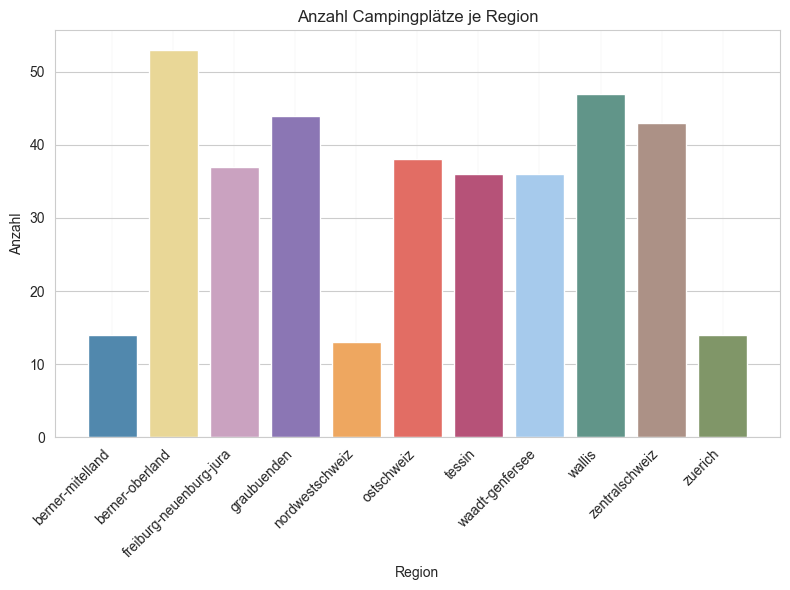

In [144]:
# Gestapeltes Säulendiagramm erstellen
fig, ax = plt.subplots(figsize=(8, 6))

# Anzahl der Zeilen im DataFrame
num_rows = len(df_region_encoded)

# Schleife über jede Spalte im DataFrame
for i, col in enumerate(df_region_encoded.columns):
    values = df_region_encoded[col].values
    region = col.lower()

    # Farbe abrufen
    if region in color_palette['region']:
        color = color_palette['color'][color_palette['region'].index(region)]
    else:
        color = '#CCCCCC'

    # Höhe der Säule
    ax.bar(i, sum(values), color=color)

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Anzahl')
ax.set_xlabel('Region')
ax.set_title('Anzahl Campingplätze je Region')

xticklabels = [col[7:] for col in df_region_encoded.columns]
ax.set_xticks(range(len(df_region_encoded.columns)))
ax.set_xticklabels(xticklabels, rotation=45, ha='right')

# Vertikale Hilfslinien ausschalten
ax.grid(which='major', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()

### Region in Gesamt-DF intgrieren

In [119]:
df_camping = pd.concat([df_camping, df_region_encoded], axis=1)

In [120]:
df_camping

,url,name,locality,website,star category,activities,tourist pitches,open (seasons 1),open (seasons 2),open (seasons 3),...,region_berner-oberland,region_freiburg-neuenburg-jura,region_graubuenden,region_nordwestschweiz,region_ostschweiz,region_tessin,region_waadt-genfersee,region_wallis,region_zentralschweiz,region_zuerich
0,https://camping.ch/de/campingplatz/graubuenden...,Islas,7477 Filisur (GR),www.campingislas.ch,3,3,50.0,01.04.2024 − 31.10.2024,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
1,https://camping.ch/de/campingplatz/ostschweiz/...,Stellplatz Allmend Rheintal,9450 Altstätten (SG),NaN,0,7,150.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
2,https://camping.ch/de/campingplatz/freiburg-ne...,Camping de la Forêt,1642 Sorens (FR),NaN,4,4,50.0,15.04.2024 − 15.10.2024,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
3,https://camping.ch/de/campingplatz/graubuenden...,Sur En / Sent,7554 Sur En / Sent (GR),NaN,4,4,120.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
4,https://camping.ch/de/campingplatz/wallis/evol...,Evolène,1983 Evolène (VS),NaN,3,1,65.0,15.05.2024 − 15.10.2024,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,https://camping.ch/de/campingplatz/berner-ober...,Alpencamping,3860 Meiringen (BE),www.alpencamping.ch,4,11,34.0,01.01.2024 − 31.12.2024,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
373,https://camping.ch/de/campingplatz/wallis/fies...,Eggishorn,3984 Fiesch (VS),NaN,4,6,127.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
374,https://camping.ch/de/campingplatz/berner-ober...,Camping Hobby 3,3800 Unterseen-Interlaken (BE),NaN,4,11,80.0,01.04.2024 − 04.10.2024,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
375,https://camping.ch/de/campingplatz/tessin/meri...,Camping Monte San Giorgio,6866 Meride (TI),NaN,4,8,64.0,19.04.2024 − 29.09.2024,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0


## Zusammenfassung der Attribute/Faktoren
z.B. Gastronomieangebot ist vorhanden, wenn es entweder ein Restaurant oder ein Take Away gibt.

In [121]:
# washing
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['washing machine'] + row['laundry dryer / tumble dryer']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['washing and dryer'] = df_camping.apply(calculate_result, axis=1)

In [122]:
# Restaurants, Bars
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['restaurant'] + row['take away']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['gastronomy'] = df_camping.apply(calculate_result, axis=1)

In [123]:
# shopping
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['shop with limited range'] + row['kiosk'] + row['shopping centre'] + row['shop with rich range']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['shop'] = df_camping.apply(calculate_result, axis=1)

In [124]:
# water side
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['lake with sandy beach'] + row['lake with stony beach'] + row['river']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['camping by the water'] = df_camping.apply(calculate_result, axis=1)

In [125]:
# membership
# Summe aller Mitgliedschaften werden zusammengezählt
def calculate_result(row):
    total = row['VSC membership'] + row['TCS membership'] + row['SCCV membership']
    return total

# Ergebnis in neue Spalte speichern
df_camping['memberships'] = df_camping.apply(calculate_result, axis=1)

In [126]:
df_camping

,url,name,locality,website,star category,activities,tourist pitches,open (seasons 1),open (seasons 2),open (seasons 3),...,region_tessin,region_waadt-genfersee,region_wallis,region_zentralschweiz,region_zuerich,washing and dryer,gastronomy,shop,camping by the water,memberships
0,https://camping.ch/de/campingplatz/graubuenden...,Islas,7477 Filisur (GR),www.campingislas.ch,3,3,50.0,01.04.2024 − 31.10.2024,NaN,NaN,...,0,0,0,0,0,1,0,0,0,2
1,https://camping.ch/de/campingplatz/ostschweiz/...,Stellplatz Allmend Rheintal,9450 Altstätten (SG),NaN,0,7,150.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,https://camping.ch/de/campingplatz/freiburg-ne...,Camping de la Forêt,1642 Sorens (FR),NaN,4,4,50.0,15.04.2024 − 15.10.2024,NaN,NaN,...,0,0,0,0,0,1,1,1,0,1
3,https://camping.ch/de/campingplatz/graubuenden...,Sur En / Sent,7554 Sur En / Sent (GR),NaN,4,4,120.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,0,0,0,1,0,0,1,1
4,https://camping.ch/de/campingplatz/wallis/evol...,Evolène,1983 Evolène (VS),NaN,3,1,65.0,15.05.2024 − 15.10.2024,NaN,NaN,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,https://camping.ch/de/campingplatz/berner-ober...,Alpencamping,3860 Meiringen (BE),www.alpencamping.ch,4,11,34.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,0,0,0,1,1,1,1,1
373,https://camping.ch/de/campingplatz/wallis/fies...,Eggishorn,3984 Fiesch (VS),NaN,4,6,127.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,1,0,0,1,1,1,1,1
374,https://camping.ch/de/campingplatz/berner-ober...,Camping Hobby 3,3800 Unterseen-Interlaken (BE),NaN,4,11,80.0,01.04.2024 − 04.10.2024,NaN,NaN,...,0,0,0,0,0,1,0,1,1,1
375,https://camping.ch/de/campingplatz/tessin/meri...,Camping Monte San Giorgio,6866 Meride (TI),NaN,4,8,64.0,19.04.2024 − 29.09.2024,NaN,NaN,...,1,0,0,0,0,1,0,0,1,2


In [127]:
df_camping.dtypes

url                     object
name                    object
locality                object
website                 object
star category            int64
                         ...  
washing and dryer        int64
gastronomy               int64
shop                     int64
camping by the water     int64
memberships              int64
Length: 69, dtype: object

# Manuelle Daten (Preis)
## Import

In [128]:
df_price = pd.read_csv('rohdaten_preis.csv', encoding='utf-8', sep=';')
df_price

,url,Preisseite,Latitude,Longitude,pitch on the shore,other accommodation,small pitch (<80 m2),medium pitch (~100 m2),large pitch (>110 m2),main season,low season,total_price
0,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0.0,1.0,1,0,0,1,0,38.0
1,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0.0,1.0,0,1,0,1,0,43.0
2,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0.0,1.0,1,0,0,0,1,40.0
3,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0.0,1.0,0,1,0,0,1,45.0
4,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-st-c...,46.698692,9.558404,0.0,1.0,1,0,0,1,0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...
826,https://camping.ch/de/campingplatz/berner-mite...,https://www.camping-lindenhof.ch/de/tarife-inf...,47.093373,7.210469,0.0,0.0,1,0,0,1,1,31.2
827,https://camping.ch/de/campingplatz/berner-mite...,https://www.camping-lindenhof.ch/de/tarife-inf...,47.093373,7.210469,0.0,0.0,0,1,0,1,1,37.2
828,https://camping.ch/de/campingplatz/berner-mite...,https://seeland-camp.ch/preise/,47.162189,7.346157,0.0,0.0,1,0,0,0,1,26.7
829,https://camping.ch/de/campingplatz/berner-mite...,https://seeland-camp.ch/preise/,47.162189,7.346157,0.0,0.0,1,0,0,1,0,28.7


### Leere Zeilen löschen

In [129]:
len(df_price)

831

In [130]:
# alle Zeilen, welche keinen Preis hinterlegt haben, werden gelöscht
df_price = df_price[df_price['total_price'] != 0]

In [131]:
len(df_price)

806

## Format prüfen

In [132]:
df_price.dtypes

url                         object
Preisseite                  object
Latitude                   float64
Longitude                  float64
pitch on the shore         float64
other accommodation        float64
small pitch (<80 m2)         int64
medium pitch  (~100 m2)      int64
large pitch  (>110 m2)       int64
main season                  int64
low season                   int64
total_price                float64
dtype: object

In [133]:
df_price['pitch on the shore'] = df_price['pitch on the shore'].astype(int)
df_price['other accommodation'] = df_price['other accommodation'].astype(int)
df_price.dtypes

C:\Users\sarak\AppData\Local\Temp\ipykernel_17468\849041600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['pitch on the shore'] = df_price['pitch on the shore'].astype(int)
C:\Users\sarak\AppData\Local\Temp\ipykernel_17468\849041600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['other accommodation'] = df_price['other accommodation'].astype(int)


url                         object
Preisseite                  object
Latitude                   float64
Longitude                  float64
pitch on the shore           int32
other accommodation          int32
small pitch (<80 m2)         int64
medium pitch  (~100 m2)      int64
large pitch  (>110 m2)       int64
main season                  int64
low season                   int64
total_price                float64
dtype: object

# Zusammenführen der Tabellen

In [134]:
# Basisliste ist manuell erstellte Liste (df_price)
df_camping_all  = pd.merge(df_price, df_camping, on='url', how='left')

In [135]:
df_camping_all

,url,Preisseite,Latitude,Longitude,pitch on the shore,other accommodation,small pitch (<80 m2),medium pitch (~100 m2),large pitch (>110 m2),main season,...,region_tessin,region_waadt-genfersee,region_wallis,region_zentralschweiz,region_zuerich,washing and dryer,gastronomy,shop,camping by the water,memberships
0,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,1,1
1,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1
2,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
4,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-st-c...,46.698692,9.558404,0,1,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,https://camping.ch/de/campingplatz/berner-mite...,https://www.camping-lindenhof.ch/de/tarife-inf...,47.093373,7.210469,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
802,https://camping.ch/de/campingplatz/berner-mite...,https://www.camping-lindenhof.ch/de/tarife-inf...,47.093373,7.210469,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
803,https://camping.ch/de/campingplatz/berner-mite...,https://seeland-camp.ch/preise/,47.162189,7.346157,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
804,https://camping.ch/de/campingplatz/berner-mite...,https://seeland-camp.ch/preise/,47.162189,7.346157,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [136]:
len(df_camping_all)

806

In [137]:
# Bearbeitete Daten als CSV speichern
df_camping_all.to_csv('df_camping_all.csv', encoding='utf-8', index=False)

In [138]:
df_camping_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   url                              806 non-null    object 
 1   Preisseite                       806 non-null    object 
 2   Latitude                         806 non-null    float64
 3   Longitude                        806 non-null    float64
 4   pitch on the shore               806 non-null    int32  
 5   other accommodation              806 non-null    int32  
 6   small pitch (<80 m2)             806 non-null    int64  
 7   medium pitch  (~100 m2)          806 non-null    int64  
 8   large pitch  (>110 m2)           806 non-null    int64  
 9   main season                      806 non-null    int64  
 10  low season                       806 non-null    int64  
 11  total_price                      806 non-null    float64
 12  name                  

### Aufbau verkürzter Tabelle

In [147]:
df_camping_clean =df_camping_all[['name', 'locality', 'Latitude', 'Longitude',

                              'tourist pitches', 'other accommodation', 'small pitch (<80 m2)', 'medium pitch  (~100 m2)', 'large pitch  (>110 m2)', 'pitch on the shore', 'easy access for disabled people', 'animals allowed','washing and dryer', 'lounge',

                              'kitchen', 'BBQ area','gastronomy', 'shop',

                              'indoor swimming pool', 'unheated pool', 'bathing facilities', 'baby pool', 'sport field', 'golf', 'tennis', 'disco', 'wifi', 'playground', 'entertainment', 'boat rental', 'bike rental',

                              'open[%]', 'total_price', 'info corner',

                              'star category', 'memberships',

                              'region', 'region_berner-mitelland','region_berner-oberland','region_freiburg-neuenburg-jura','region_graubuenden','region_nordwestschweiz','region_ostschweiz','region_tessin','region_waadt-genfersee','region_wallis','region_zentralschweiz','region_zuerich', 'main season', 'low season',

                              'hiking', 'camping by the water', 'activities',

                             'train station', 'bus',
]]

# Bearbeitete Daten als CSV speichern
df_camping_clean.to_csv('camping_clean.csv', encoding='utf-8', index=False)

In [148]:
df_camping_clean

,name,locality,Latitude,Longitude,tourist pitches,other accommodation,small pitch (<80 m2),medium pitch (~100 m2),large pitch (>110 m2),pitch on the shore,...,region_wallis,region_zentralschweiz,region_zuerich,main season,low season,hiking,camping by the water,activities,train station,bus
0,Camping Gravas,7078 Lenzerheide (GR),46.722760,9.555440,35.0,1,1,0,0,0,...,0,0,0,1,0,1,1,8,0,1
1,Camping Gravas,7078 Lenzerheide (GR),46.722760,9.555440,35.0,1,0,1,0,0,...,0,0,0,1,0,1,1,8,0,1
2,Camping Gravas,7078 Lenzerheide (GR),46.722760,9.555440,35.0,1,1,0,0,0,...,0,0,0,0,1,1,1,8,0,1
3,Camping Gravas,7078 Lenzerheide (GR),46.722760,9.555440,35.0,1,0,1,0,0,...,0,0,0,0,1,1,1,8,0,1
4,Camping St. Cassian,7083 Lenz b. Lenzerheide (GR),46.698692,9.558404,70.0,1,1,0,0,0,...,0,0,0,1,0,1,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,Lindenhof,ch-2572 Sutz-Lattrigen (BE),47.093373,7.210469,50.0,0,1,0,0,0,...,0,0,0,1,1,0,1,7,0,0
802,Lindenhof,ch-2572 Sutz-Lattrigen (BE),47.093373,7.210469,50.0,0,0,1,0,0,...,0,0,0,1,1,0,1,7,0,0
803,Seeland Camp,2554 Meinisberg (BE),47.162189,7.346157,25.0,0,1,0,0,0,...,0,0,0,0,1,0,0,5,1,1
804,Seeland Camp,2554 Meinisberg (BE),47.162189,7.346157,25.0,0,1,0,0,0,...,0,0,0,1,0,0,0,5,1,1
